In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from code.geo import *
import matplotlib.pyplot as plt

In [3]:

citycenter = (37.77, -122.454)
print 'SEDAC res: 2.5 arcmin = ', 2.5/60, 'degrees'

d = 16000
print 'in distance: %d feet = %6.4f degrees = %3.2f miles' % (d, distance_to_angle(citycenter, d, 0)[0], d/5280.)

d = 500
print 'walkscore res: %d feet = %6.4f degrees = %3.2f miles' % (d, distance_to_angle(citycenter, d, 0)[0], d/5280.)

SEDAC res: 2.5 arcmin =  0.0416666666667 degrees
in distance: 16000 feet = 0.0439 degrees = 3.03 miles
walkscore res: 500 feet = 0.0014 degrees = 0.09 miles


(100, 6)


,nodex,nodey,f1,f2,f3,f4
0,1,1,0,1,0,0
1,2,1,0,1,0,0
2,3,1,0,1,0,0
3,4,1,0,1,0,0
4,5,1,0,1,0,0


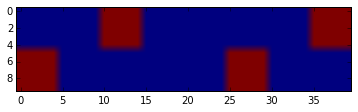

In [4]:
coords = np.arange(1, 11)
g = np.meshgrid(coords, coords)

gdf = pd.DataFrame({'nodex': g[0].ravel(), 'nodey': g[1].ravel()})

gdf['f1'] = np.r_[np.tile(np.repeat([0,1], [5,5]), 5), np.zeros(50)]
gdf['f2'] = np.r_[np.tile(np.repeat([1,0], [5,5]), 5), np.zeros(50)]
gdf['f3'] = np.r_[np.zeros(50), np.tile(np.repeat([0,1], [5,5]), 5)]
gdf['f4'] = np.r_[np.zeros(50), np.tile(np.repeat([1,0], [5,5]), 5)]

print gdf.shape
plt.imshow(pd.pivot_table(gdf, index='nodex', columns='nodey'))
gdf.head()


In [5]:
np.r_[np.tile(np.repeat([0,1], [5,5]), 5), np.zeros(50)]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [6]:
def find_neib(x, y):
    neibs = [[x + 1, y],
             [x - 1, y],
             [x, y + 1],
             [x, y - 1]]
    return np.array(neibs)
find_neib(2, 2)

array([[3, 2],
       [1, 2],
       [2, 3],
       [2, 1]])

In [7]:
edges = pd.DataFrame()

for row in gdf.index:
    x = gdf.iloc[row, 0]
    y = gdf.iloc[row, 1]
    neib = find_neib(x, y)
    newdf = np.vstack((x*np.ones(4),
                       y*np.ones(4),
                       neib.T)).T
    edges = pd.concat((edges, pd.DataFrame(newdf)))
edges.columns = ['nodex', 'nodey', 'neibx', 'neiby']

print edges.shape
edges.head()

(400, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,0,1
2,1,1,1,2
3,1,1,1,0
0,2,1,3,1


In [8]:
# drop non-existent points
edges = edges[edges.neibx.apply(lambda x: x in coords)]
edges = edges[edges.neiby.apply(lambda x: x in coords)]
edges.index = np.arange(0, edges.shape[0])
print edges.shape
edges.head()

(360, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,1,2
2,2,1,3,1
3,2,1,1,1
4,2,1,2,2


In [9]:
def dist(x1, y1, x2, y2, features):
    f1 = features[(features.nodex == x1) & (features.nodey == y1)].iloc[:,2:]
    f2 = features[(features.nodex == x2) & (features.nodey == y2)].iloc[:,2:]
    
    f1 = np.array(f1).flatten()
    f2 = np.array(f2).flatten()
    return np.linalg.norm(f1-f2)

print dist(1, 1, 2, 1, gdf)
print dist(1, 1, 1, 6, gdf)
    

0.0
1.41421356237


In [10]:
distances = edges.apply(lambda x: dist(x.nodex, x.nodey, x.neibx, x.neiby, gdf), axis=1)
edges[distances != 0]

,nodex,nodey,neibx,neiby
11,5,1,6,1
15,6,1,5,1
43,5,2,6,2
48,6,2,5,2
81,5,3,6,3
86,6,3,5,3
119,5,4,6,4
124,6,4,5,4
143,1,5,1,6
147,2,5,2,6


# single feature, 4 valued

(144, 3)


,nodex,nodey,f1
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,0
4,5,1,0


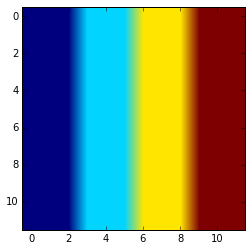

In [11]:
coords = np.arange(1, 13)
g = np.meshgrid(coords, coords)

gdf = pd.DataFrame({'nodex': g[0].ravel(), 'nodey': g[1].ravel()})

gdf['f1'] = np.repeat([0, 1, 2, 3], [36, 36, 36, 36])


print gdf.shape
plt.imshow(pd.pivot_table(gdf, index='nodex', columns='nodey'))
gdf.head()

In [12]:
edges = pd.DataFrame()

for row in gdf.index:
    x = gdf.iloc[row, 0]
    y = gdf.iloc[row, 1]
    neib = find_neib(x, y)
    newdf = np.vstack((x*np.ones(4),
                       y*np.ones(4),
                       neib.T)).T
    edges = pd.concat((edges, pd.DataFrame(newdf)))
edges.columns = ['nodex', 'nodey', 'neibx', 'neiby']

print edges.shape
edges.head()

(576, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,0,1
2,1,1,1,2
3,1,1,1,0
0,2,1,3,1


In [13]:
# drop non-existent points
edges = edges[edges.neibx.apply(lambda x: x in coords)]
edges = edges[edges.neiby.apply(lambda x: x in coords)]
edges.index = np.arange(0, edges.shape[0])
print edges.shape
edges.head()

(528, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,1,2
2,2,1,3,1
3,2,1,1,1
4,2,1,2,2


In [14]:
edges['distances'] = edges.apply(lambda x: dist(x.nodex, x.nodey, x.neibx, x.neiby, gdf), axis=1)
edges[edges.distances != 0]

,nodex,nodey,neibx,neiby,distances
81,1,3,1,4,1
85,2,3,2,4,1
89,3,3,3,4,1
93,4,3,4,4,1
97,5,3,5,4,1
101,6,3,6,4,1
105,7,3,7,4,1
109,8,3,8,4,1
113,9,3,9,4,1
117,10,3,10,4,1


# geo-spatial clustering using iris dataset

In [61]:
from sklearn import datasets
iris = datasets.load_iris()
idf = pd.DataFrame(iris.data)
idf.columns = ['f1', 'f2', 'f3', 'f4']
idf['target'] = iris.target
print idf.shape
idf.head()

(150, 5)


,f1,f2,f3,f4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


(100, 2)
(100, 7)
(100, 5)


,nodex,nodey,f1,f2,f3,f4,target
0,1,1,5.1,3.5,1.4,0.2,0
1,2,1,4.9,3.0,1.4,0.2,0
2,3,1,4.7,3.2,1.3,0.2,0
3,4,1,4.6,3.1,1.5,0.2,0
4,5,1,5.0,3.6,1.4,0.2,0


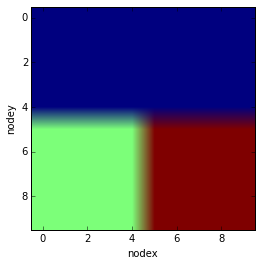

In [62]:
coords = np.arange(1, 11)
g = np.meshgrid(coords, coords)

gdf = pd.DataFrame({'nodex': g[0].ravel(), 'nodey': g[1].ravel()})

d = idf[idf.target == 0]
d.reindex(np.random.permutation(d.index))
d2 = idf[idf.target == 1][:25]
d2.reindex(np.random.permutation(d2.index))
d3 = idf[idf.target == 2][:25]
d3.reindex(np.random.permutation(d3.index))

for i in xrange(5, 26, 5):
    d = pd.concat([d, d2[i-5:i], d3[i-5:i]])
#d = pd.DataFrame(np.array(d))
d.reset_index(inplace=True)
d.drop('index', axis=1, inplace=True)


print gdf.shape
gdf = pd.concat([gdf, d], axis=1)
    

print gdf.shape
print d.shape
plt.imshow(pd.pivot_table(gdf, columns='nodex', index='nodey', values='target'))
plt.xlabel('nodex')
plt.ylabel('nodey')
gdf.head()

In [63]:
edges = pd.DataFrame()

for row in gdf.index:
    x = gdf.iloc[row, 0]
    y = gdf.iloc[row, 1]
    neib = find_neib(x, y)
    newdf = np.vstack((x*np.ones(4),
                       y*np.ones(4),
                       neib.T)).T
    edges = pd.concat((edges, pd.DataFrame(newdf)))
edges.columns = ['nodex', 'nodey', 'neibx', 'neiby']

print edges.shape
edges.head()

(400, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,0,1
2,1,1,1,2
3,1,1,1,0
0,2,1,3,1


In [64]:
# drop non-existent points
edges = edges[edges.neibx.apply(lambda x: x in coords)]
edges = edges[edges.neiby.apply(lambda x: x in coords)]
edges.index = np.arange(0, edges.shape[0])
print edges.shape
edges.head()

(360, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,1,2
2,2,1,3,1
3,2,1,1,1
4,2,1,2,2


In [65]:
edges['distances'] = edges.apply(lambda x: dist(x.nodex, x.nodey, x.neibx, x.neiby, gdf.drop('target', axis=1)), axis=1)
#edges['meanx'] = edges.nodex/2. + edges.neibx/2.
#edges['meany'] = edges.nodey/2. + edges.neiby/2.

edges

,nodex,nodey,neibx,neiby,distances
0,1,1,2,1,0.538516
1,1,1,1,2,0.374166
2,2,1,3,1,0.300000
3,2,1,1,1,0.538516
4,2,1,2,2,0.458258
5,3,1,4,1,0.244949
6,3,1,2,1,0.300000
7,3,1,3,2,0.264575
8,4,1,5,1,0.648074
9,4,1,3,1,0.244949


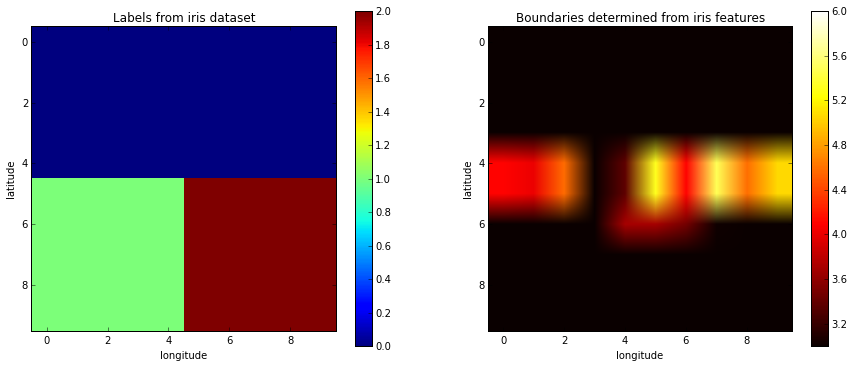

In [73]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(pd.pivot_table(gdf, columns='nodex', index='nodey', values='target'),
          interpolation='nearest')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Labels from iris dataset')

plt.subplot(122)
plt.imshow(pd.pivot_table(edges, columns='nodex', index='nodey', values='distances',
                          aggfunc='max'), clim = (3, 6), cmap='hot')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Boundaries determined from iris features')
plt.colorbar()

#plt.savefig('images/iristest.png')

plt.show()

In [67]:
gdf[((gdf.nodex == 5) | (gdf.nodex == 6)) & (gdf.target != 0)].sort('target')

,nodex,nodey,f1,f2,f3,f4,target
54,5,6,6.5,2.8,4.6,1.5,1
64,5,7,5.2,2.7,3.9,1.4,1
74,5,8,5.6,2.9,3.6,1.3,1
84,5,9,5.6,2.5,3.9,1.1,1
94,5,10,6.4,2.9,4.3,1.3,1
55,6,6,6.3,3.3,6.0,2.5,2
65,6,7,7.6,3.0,6.6,2.1,2
75,6,8,6.5,3.2,5.1,2.0,2
85,6,9,6.4,3.2,5.3,2.3,2
95,6,10,6.9,3.2,5.7,2.3,2


In [68]:
#all target 2
edges[(edges.nodex == 6) & (edges.neibx == 6) & (edges.nodey > 5)]

,nodex,nodey,neibx,neiby,distances
201,6,6,6,7,1.516575
202,6,6,6,5,5.323533
239,6,7,6,8,1.873499
240,6,7,6,6,1.516575
277,6,8,6,9,0.374166
278,6,8,6,7,1.873499
315,6,9,6,10,0.640312
316,6,9,6,8,0.374166
348,6,10,6,9,0.640312


In [69]:
#target 1 to target 2
edges[(edges.nodex == 5) & (edges.neibx == 6) & (edges.nodey > 5)]

,nodex,nodey,neibx,neiby,distances
195,5,6,6,6,1.802776
233,5,7,6,7,3.691883
271,5,8,6,8,1.907878
309,5,9,6,9,2.128380
343,5,10,6,10,1.816590


In [70]:
res = np.zeros((idf.shape[0], idf.shape[0]))
for idx1 in idf.index:
    for idx2 in idf.index:
        res[idx1, idx2] = np.linalg.norm(idf.ix[idx1][:-1] - idf.ix[idx2][:-1])
        

<matplotlib.colorbar.Colorbar instance at 0x10675b488>

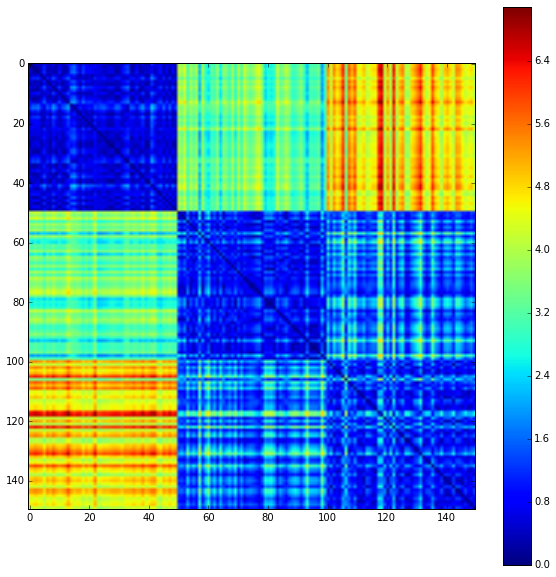

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(res)
plt.colorbar()

In [72]:
np.linalg.norm(idf.ix[0][:-1] - idf.ix[1][:-1])

0.53851648071345015

In [77]:
gdf.iloc[0,2:-1]

f1    5.1
f2    3.5
f3    1.4
f4    0.2
Name: 0, dtype: float64